c. Repeart part (b) with TensorFlow & Keras libraries.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
dataFrame = pd.read_csv("https://raw.githubusercontent.com/DogukanOzyurt/DiabetesBinaryClassification./main/DiabetesBinaryClassification.csv")

In [ ]:
dataFrame

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataFrame.info

<bound method DataFrame.info of      Number of times pregnant  \
0                           6   
1                           1   
2                           8   
3                           1   
4                           0   
..                        ...   
763                        10   
764                         2   
765                         5   
766                         1   
767                         1   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                  148                          
1                                                   85                          
2                                                  183                          
3                                                   89                          
4                                                  137                          
..                                                 ...                          
763 

In [ ]:
number_of_inputs = 8
train_split = 0.8
val_split = 0.1
test_split = 0.1
iodataset = dataFrame.values
np.random.shuffle(iodataset)

In [ ]:
iodataset.shape

(768, 9)

In [ ]:
indices_or_sections = [int(train_split * len(dataFrame)), int((1 - val_split - test_split) * len(dataFrame))]
train_set, val_set, test_set = np.split(iodataset, indices_or_sections)
print("Train set size: ", len(train_set))
print("Validation set size: ", len(val_set))
print("Test set size: ", len(test_set))
x_train = train_set[:,0:number_of_inputs]
d_train = train_set[:,number_of_inputs]

Train set size:  614
Validation set size:  0
Test set size:  154


In [ ]:
x_train.shape

(614, 8)

In [ ]:
d_train.shape

(614,)

In [ ]:
d_train

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0.

In [ ]:
val_set

array([], shape=(0, 9), dtype=float64)

In [ ]:
learning_rate = 0.01
epochs = 10
batch_size = 16

# Loss function selection
#my_loss_function = "mean_squared_error"
#my_loss_function = "mean_absolute_error"
#my_loss_function = "mean_absolute_percentage_error"
#my_loss_function = "mean_squared_logarithmic_error"
my_loss_function = "binary_crossentropy"

# Optimizer selection
#my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop')
#my_optimizer = tf.keras.optimizers.Adam(learning_rate=my_learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
my_optimizer = "adam"
#my_optimizer = "sgd"
#my_optimizer = "none"

# Metrics selection
#my_metrics = tf.keras.metrics.MeanSquaredError()
#my_metrics = tf.keras.metrics.MeanAbsoluteError()
#my_metrics = tf.keras.metrics.MeanAbsolutePercentageError()
#my_metrics = tf.keras.metrics.MeanSquaredLogarithmicError()
my_metrics = "accuracy"

# Model
model_normalizer = tf.keras.layers.Normalization(input_shape=[number_of_inputs,], axis=None)
model_normalizer.adapt(np.array(x_train))

model = tf.keras.models.Sequential([
model_normalizer,
tf.keras.layers.Dense(units=number_of_inputs, input_shape=(number_of_inputs,), activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile
model.compile(loss=my_loss_function, metrics=[my_metrics])

# Train
history = model.fit(x=x_train, y=d_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
35/35 [==============================] - 1s 10ms/step - loss: 0.6598 - accuracy: 0.6558 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6174 - accuracy: 0.6866 - val_loss: 0.6929 - val_accuracy: 0.5323
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5880 - accuracy: 0.7047 - val_loss: 0.6975 - val_accuracy: 0.5484
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5614 - accuracy: 0.7192 - val_loss: 0.6025 - val_accuracy: 0.6935
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5337 - accuracy: 0.7228 - val_loss: 0.6270 - val_accuracy: 0.6613
Epoch 6/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5193 - accuracy: 0.7391 - val_loss: 0.5525 - val_accuracy: 0.7097
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5059 - accuracy: 0.7518 - val_loss: 0.5939 - val_accuracy: 0.6613
Epoch 8/10
35/35 [=

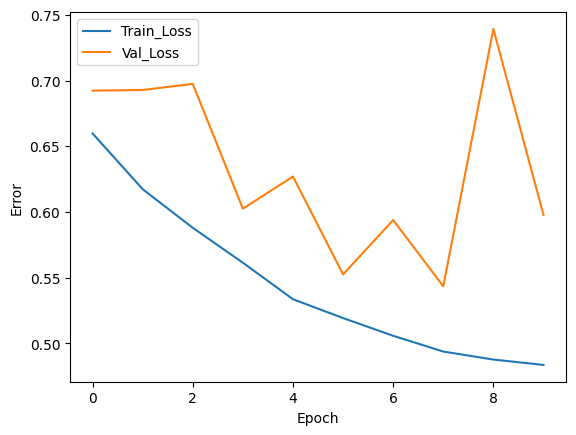

In [ ]:
# Gather the trained model's weight and bias.
trained_w = model.get_weights()[0]
trained_b = model.get_weights()[1]

# The list of epochs is stored separately from the rest of history.
epochs_array = history.epoch

# Gather the history (a snapshot) of each epoch.
hist = pd.DataFrame(history.history)

train_error_array = hist["loss"]
val_error_array = hist["val_loss"]

train_acc_array = hist["accuracy"]
val_acc_array = hist["val_accuracy"]

# Plot Loss Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(epochs_array, train_error_array, label="Train_Loss")
plt.plot(epochs_array, val_error_array, label="Val_Loss")
plt.legend()
plt.show()


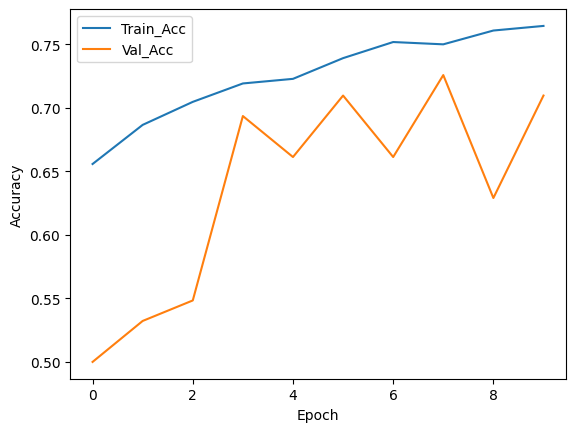

In [ ]:
# Plot Accuracy Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(epochs_array, train_acc_array, label="Train_Acc")
plt.plot(epochs_array, val_acc_array, label="Val_Acc")
plt.legend()
plt.show()


In [ ]:
# Evaluate
x_test = test_set[:,0:number_of_inputs]
d_test = test_set[:,number_of_inputs]
results = model.evaluate(x_test, d_test,batch_size=1)
print("test loss, test acc:", results)


154/154 [==============================] - 1s 5ms/step - loss: 0.5554 - accuracy: 0.7208
test loss, test acc: [0.5553707480430603, 0.7207792401313782]


In [ ]:
# Predict
predictions = model.predict(x_test,batch_size=1)
print('  predictions    actual')
print(np.c_[predictions, d_test])

154/154 [==============================] - 0s 1ms/step
  predictions    actual
[[0.1449742  0.        ]
 [0.66451406 1.        ]
 [0.20412889 0.        ]
 [0.36487532 0.        ]
 [0.6375705  0.        ]
 [0.12549748 1.        ]
 [0.06135296 1.        ]
 [0.17704791 0.        ]
 [0.20535997 1.        ]
 [0.2316324  0.        ]
 [0.71826833 1.        ]
 [0.08621015 0.        ]
 [0.70094049 1.        ]
 [0.21098605 0.        ]
 [0.46209428 0.        ]
 [0.21737279 1.        ]
 [0.62649    0.        ]
 [0.50974536 0.        ]
 [0.13193859 0.        ]
 [0.06060413 0.        ]
 [0.26873225 1.        ]
 [0.10622767 1.        ]
 [0.31669477 0.        ]
 [0.06718455 0.        ]
 [0.58834547 0.        ]
 [0.28419337 0.        ]
 [0.12048658 0.        ]
 [0.12708239 0.        ]
 [0.25104314 0.        ]
 [0.85183084 1.        ]
 [0.46768492 0.        ]
 [0.03841646 0.        ]
 [0.37965468 0.        ]
 [0.63275373 1.        ]
 [0.12876184 0.        ]
 [0.86013281 0.        ]
 [0.21568656 1.      

d. Using TensorFlow & Keras libraries and the same dataset, try to find a better NN topology (i.e., lower test error) by playing with number of hidden layers and neurons.

## We changed the number of epochs

Epoch 1/30
35/35 [==============================] - 1s 8ms/step - loss: 0.6532 - accuracy: 0.6576 - val_loss: 0.7395 - val_accuracy: 0.5161
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.6721 - val_loss: 0.6856 - val_accuracy: 0.5323
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7373 - val_loss: 0.5856 - val_accuracy: 0.7258
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7446 - val_loss: 0.5737 - val_accuracy: 0.7097
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7699 - val_loss: 0.6494 - val_accuracy: 0.6290
Epoch 6/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7591 - val_loss: 0.6025 - val_accuracy: 0.6935
Epoch 7/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7663 - val_loss: 0.5600 - val_accuracy: 0.7258
Epoch 8/30
35/35 [==

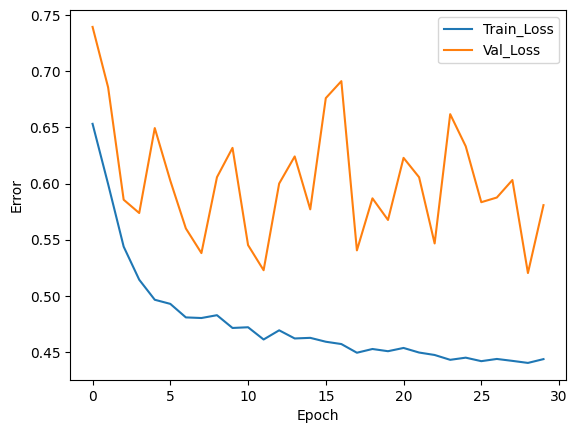

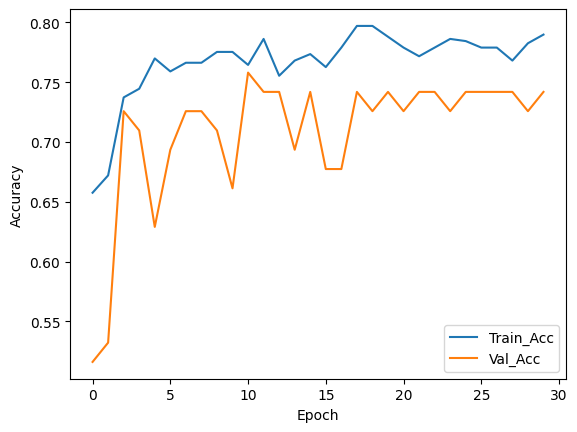

154/154 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7143
test loss, test acc: [0.5455706715583801, 0.7142857313156128]
154/154 [==============================] - 0s 2ms/step
  predictions    actual
[[0.16965739 0.        ]
 [0.49454048 1.        ]
 [0.20435186 0.        ]
 [0.30405128 0.        ]
 [0.67747575 0.        ]
 [0.1758271  1.        ]
 [0.0440209  1.        ]
 [0.11092339 0.        ]
 [0.32488522 1.        ]
 [0.26787546 0.        ]
 [0.78459883 1.        ]
 [0.03386611 0.        ]
 [0.71180493 1.        ]
 [0.07955549 0.        ]
 [0.5178346  0.        ]
 [0.25597602 1.        ]
 [0.65349859 0.        ]
 [0.66296208 0.        ]
 [0.12272383 0.        ]
 [0.09535198 0.        ]
 [0.24268529 1.        ]
 [0.0744489  1.        ]
 [0.47580534 0.        ]
 [0.01594476 0.        ]
 [0.81098878 0.        ]
 [0.36532354 0.        ]
 [0.07603952 0.        ]
 [0.14984734 0.        ]
 [0.35736573 0.        ]
 [0.83507586 1.        ]
 [0.65947586 0.     

In [ ]:
learning_rate = 0.01
epochs = 30
batch_size = 16

# Loss function selection
#my_loss_function = "mean_squared_error"
#my_loss_function = "mean_absolute_error"
#my_loss_function = "mean_absolute_percentage_error"
#my_loss_function = "mean_squared_logarithmic_error"
my_loss_function = "binary_crossentropy"

# Optimizer selection
#my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop')
#my_optimizer = tf.keras.optimizers.Adam(learning_rate=my_learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
my_optimizer = "adam"
#my_optimizer = "sgd"
#my_optimizer = "none"

# Metrics selection
#my_metrics = tf.keras.metrics.MeanSquaredError()
#my_metrics = tf.keras.metrics.MeanAbsoluteError()
#my_metrics = tf.keras.metrics.MeanAbsolutePercentageError()
#my_metrics = tf.keras.metrics.MeanSquaredLogarithmicError()
my_metrics = "accuracy"

# Model
model_normalizer = tf.keras.layers.Normalization(input_shape=[number_of_inputs,], axis=None)
model_normalizer.adapt(np.array(x_train))

model = tf.keras.models.Sequential([
model_normalizer,
tf.keras.layers.Dense(units=number_of_inputs, input_shape=(number_of_inputs,), activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile
model.compile(loss=my_loss_function, metrics=[my_metrics])

# Train
history = model.fit(x=x_train, y=d_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Gather the trained model's weight and bias.
trained_w = model.get_weights()[0]
trained_b = model.get_weights()[1]

# The list of epochs is stored separately from the rest of history.
epochs_array = history.epoch

# Gather the history (a snapshot) of each epoch.
hist = pd.DataFrame(history.history)

train_error_array = hist["loss"]
val_error_array = hist["val_loss"]

train_acc_array = hist["accuracy"]
val_acc_array = hist["val_accuracy"]

# Plot Loss Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(epochs_array, train_error_array, label="Train_Loss")
plt.plot(epochs_array, val_error_array, label="Val_Loss")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(epochs_array, train_acc_array, label="Train_Acc")
plt.plot(epochs_array, val_acc_array, label="Val_Acc")
plt.legend()
plt.show()

# Evaluate
x_test = test_set[:,0:number_of_inputs]
d_test = test_set[:,number_of_inputs]
results = model.evaluate(x_test, d_test,batch_size=1)
print("test loss, test acc:", results)

# Predict
predictions = model.predict(x_test,batch_size=1)
print('  predictions    actual')
print(np.c_[predictions, d_test])


## We increased learning_rate = from 0.01 to 0.1

Epoch 1/10
35/35 [==============================] - 3s 20ms/step - loss: 0.6141 - accuracy: 0.6866 - val_loss: 0.6576 - val_accuracy: 0.5968
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7446 - val_loss: 0.5330 - val_accuracy: 0.6935
Epoch 3/10
35/35 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.7572 - val_loss: 0.5199 - val_accuracy: 0.7419
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7790 - val_loss: 0.5409 - val_accuracy: 0.7097
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7699 - val_loss: 0.5382 - val_accuracy: 0.6774
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7572 - val_loss: 0.5621 - val_accuracy: 0.6935
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7554 - val_loss: 0.5274 - val_accuracy: 0.7258
Epoch 8/10
35/35 [=

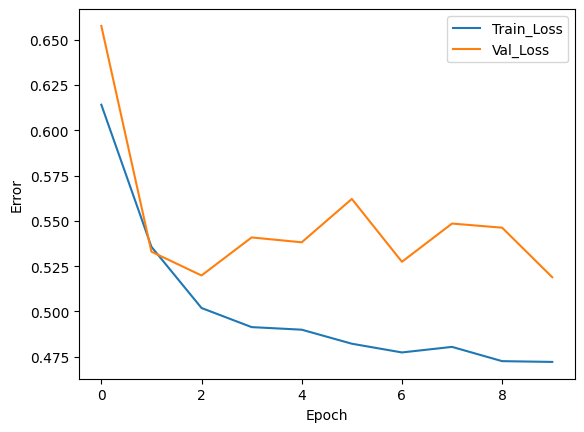

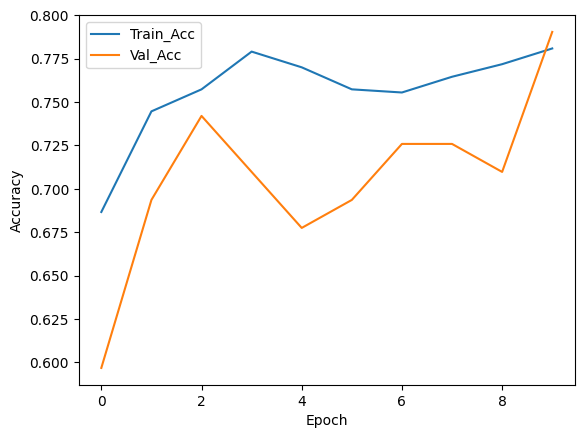

154/154 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7403
test loss, test acc: [0.5042312145233154, 0.7402597665786743]
154/154 [==============================] - 0s 1ms/step
  predictions    actual
[[0.15971932 0.        ]
 [0.40035614 1.        ]
 [0.29868799 0.        ]
 [0.45160958 0.        ]
 [0.78738862 0.        ]
 [0.43897972 1.        ]
 [0.10434929 1.        ]
 [0.1365927  0.        ]
 [0.56304896 1.        ]
 [0.50691694 0.        ]
 [0.85066885 1.        ]
 [0.07704987 0.        ]
 [0.72027248 1.        ]
 [0.2125051  0.        ]
 [0.43414617 0.        ]
 [0.34416938 1.        ]
 [0.75414443 0.        ]
 [0.4716143  0.        ]
 [0.32871065 0.        ]
 [0.16276096 0.        ]
 [0.36788812 1.        ]
 [0.21410736 1.        ]
 [0.69041818 0.        ]
 [0.06730491 0.        ]
 [0.82131499 0.        ]
 [0.23484607 0.        ]
 [0.10309553 0.        ]
 [0.11729188 0.        ]
 [0.23832078 0.        ]
 [0.85422933 1.        ]
 [0.48992565 0.     

In [ ]:
learning_rate = 0.1
epochs = 10
batch_size = 16

# Loss function selection
#my_loss_function = "mean_squared_error"
#my_loss_function = "mean_absolute_error"
#my_loss_function = "mean_absolute_percentage_error"
#my_loss_function = "mean_squared_logarithmic_error"
my_loss_function = "binary_crossentropy"

# Optimizer selection
#my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop')
#my_optimizer = tf.keras.optimizers.Adam(learning_rate=my_learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
my_optimizer = "adam"
#my_optimizer = "sgd"
#my_optimizer = "none"

# Metrics selection
#my_metrics = tf.keras.metrics.MeanSquaredError()
#my_metrics = tf.keras.metrics.MeanAbsoluteError()
#my_metrics = tf.keras.metrics.MeanAbsolutePercentageError()
#my_metrics = tf.keras.metrics.MeanSquaredLogarithmicError()
my_metrics = "accuracy"

# Model
model_normalizer = tf.keras.layers.Normalization(input_shape=[number_of_inputs,], axis=None)
model_normalizer.adapt(np.array(x_train))

model = tf.keras.models.Sequential([
model_normalizer,
tf.keras.layers.Dense(units=number_of_inputs, input_shape=(number_of_inputs,), activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile
model.compile(loss=my_loss_function, metrics=[my_metrics])

# Train
history = model.fit(x=x_train, y=d_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Gather the trained model's weight and bias.
trained_w = model.get_weights()[0]
trained_b = model.get_weights()[1]

# The list of epochs is stored separately from the rest of history.
epochs_array = history.epoch

# Gather the history (a snapshot) of each epoch.
hist = pd.DataFrame(history.history)

train_error_array = hist["loss"]
val_error_array = hist["val_loss"]

train_acc_array = hist["accuracy"]
val_acc_array = hist["val_accuracy"]

# Plot Loss Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(epochs_array, train_error_array, label="Train_Loss")
plt.plot(epochs_array, val_error_array, label="Val_Loss")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(epochs_array, train_acc_array, label="Train_Acc")
plt.plot(epochs_array, val_acc_array, label="Val_Acc")
plt.legend()
plt.show()

# Evaluate
x_test = test_set[:,0:number_of_inputs]
d_test = test_set[:,number_of_inputs]
results = model.evaluate(x_test, d_test,batch_size=1)
print("test loss, test acc:", results)

# Predict
predictions = model.predict(x_test,batch_size=1)
print('  predictions    actual')
print(np.c_[predictions, d_test])


## We increased batch_size from 16 to 32

Epoch 1/10
18/18 [==============================] - 1s 14ms/step - loss: 0.6621 - accuracy: 0.6467 - val_loss: 0.7232 - val_accuracy: 0.5161
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6314 - accuracy: 0.6703 - val_loss: 0.7207 - val_accuracy: 0.5161
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6192 - accuracy: 0.6775 - val_loss: 0.7569 - val_accuracy: 0.5323
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6009 - accuracy: 0.6612 - val_loss: 0.7565 - val_accuracy: 0.5645
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5760 - accuracy: 0.7120 - val_loss: 0.6258 - val_accuracy: 0.6613
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7228 - val_loss: 0.6890 - val_accuracy: 0.5806
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5390 - accuracy: 0.7337 - val_loss: 0.5955 - val_accuracy: 0.6452
Epoch 8/10
18/18 [=

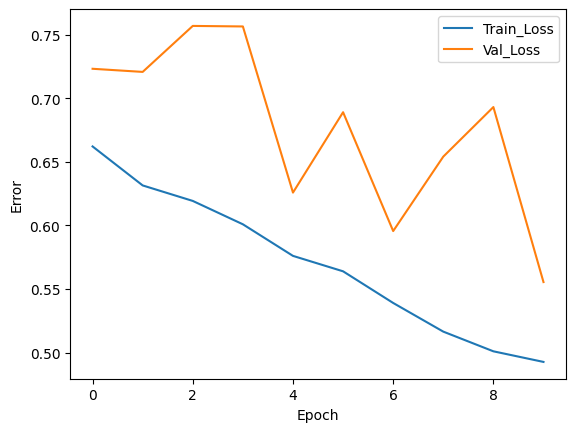

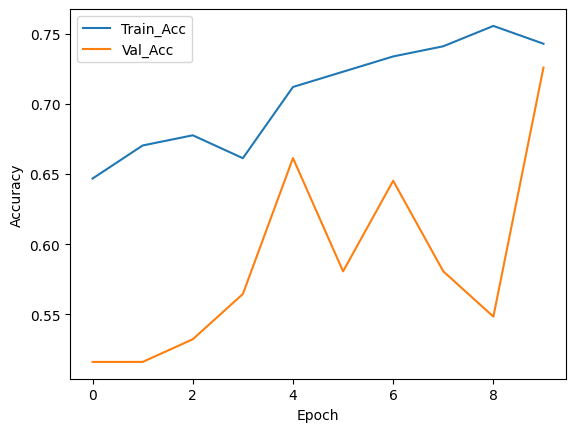

154/154 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.6883
test loss, test acc: [0.5509188771247864, 0.6883116960525513]
154/154 [==============================] - 0s 2ms/step
  predictions    actual
[[0.24085675 0.        ]
 [0.47844273 1.        ]
 [0.32293877 0.        ]
 [0.56149328 0.        ]
 [0.49711591 0.        ]
 [0.31473628 1.        ]
 [0.1144345  1.        ]
 [0.25510219 0.        ]
 [0.3857066  1.        ]
 [0.37187704 0.        ]
 [0.5326696  1.        ]
 [0.1331763  0.        ]
 [0.71461183 1.        ]
 [0.19689532 0.        ]
 [0.36565703 0.        ]
 [0.24502599 1.        ]
 [0.61808366 0.        ]
 [0.55461234 0.        ]
 [0.3223052  0.        ]
 [0.18503894 0.        ]
 [0.35242066 1.        ]
 [0.2114415  1.        ]
 [0.48022085 0.        ]
 [0.13555592 0.        ]
 [0.74297494 0.        ]
 [0.25581017 0.        ]
 [0.10915071 0.        ]
 [0.24850428 0.        ]
 [0.25240678 0.        ]
 [0.81801313 1.        ]
 [0.6301412  0.     

In [ ]:
learning_rate = 0.01
epochs = 10
batch_size = 32

# Loss function selection
#my_loss_function = "mean_squared_error"
#my_loss_function = "mean_absolute_error"
#my_loss_function = "mean_absolute_percentage_error"
#my_loss_function = "mean_squared_logarithmic_error"
my_loss_function = "binary_crossentropy"

# Optimizer selection
#my_optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop')
#my_optimizer = tf.keras.optimizers.Adam(learning_rate=my_learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
my_optimizer = "adam"
#my_optimizer = "sgd"
#my_optimizer = "none"

# Metrics selection
#my_metrics = tf.keras.metrics.MeanSquaredError()
#my_metrics = tf.keras.metrics.MeanAbsoluteError()
#my_metrics = tf.keras.metrics.MeanAbsolutePercentageError()
#my_metrics = tf.keras.metrics.MeanSquaredLogarithmicError()
my_metrics = "accuracy"

# Model
model_normalizer = tf.keras.layers.Normalization(input_shape=[number_of_inputs,], axis=None)
model_normalizer.adapt(np.array(x_train))

model = tf.keras.models.Sequential([
model_normalizer,
tf.keras.layers.Dense(units=number_of_inputs, input_shape=(number_of_inputs,), activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile
model.compile(loss=my_loss_function, metrics=[my_metrics])

# Train
history = model.fit(x=x_train, y=d_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Gather the trained model's weight and bias.
trained_w = model.get_weights()[0]
trained_b = model.get_weights()[1]

# The list of epochs is stored separately from the rest of history.
epochs_array = history.epoch

# Gather the history (a snapshot) of each epoch.
hist = pd.DataFrame(history.history)

train_error_array = hist["loss"]
val_error_array = hist["val_loss"]

train_acc_array = hist["accuracy"]
val_acc_array = hist["val_accuracy"]

# Plot Loss Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(epochs_array, train_error_array, label="Train_Loss")
plt.plot(epochs_array, val_error_array, label="Val_Loss")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(epochs_array, train_acc_array, label="Train_Acc")
plt.plot(epochs_array, val_acc_array, label="Val_Acc")
plt.legend()
plt.show()

# Evaluate
x_test = test_set[:,0:number_of_inputs]
d_test = test_set[:,number_of_inputs]
results = model.evaluate(x_test, d_test,batch_size=1)
print("test loss, test acc:", results)

# Predict
predictions = model.predict(x_test,batch_size=1)
print('  predictions    actual')
print(np.c_[predictions, d_test])


## We write a comparative code to find the best learning_rate and epoch value.
# Note: This process may take 1-2 minutes.

Best learning rate: 0.01, Best epochs: 20
Epoch 1/20
18/18 [==============================] - 1s 15ms/step - loss: 2.3407 - accuracy: 0.6159 - val_loss: 0.7814 - val_accuracy: 0.5484
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.6214 - val_loss: 0.7758 - val_accuracy: 0.5161
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6286 - accuracy: 0.6721 - val_loss: 0.7301 - val_accuracy: 0.5161
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6157 - accuracy: 0.6775 - val_loss: 0.6747 - val_accuracy: 0.5323
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.6739 - val_loss: 0.6650 - val_accuracy: 0.5161
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6022 - accuracy: 0.6848 - val_loss: 0.6457 - val_accuracy: 0.5484
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 0.5818 - accuracy: 0.6866 - val_loss: 0.6689 

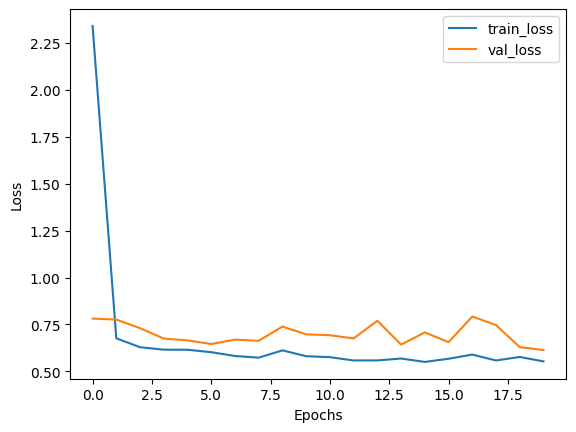

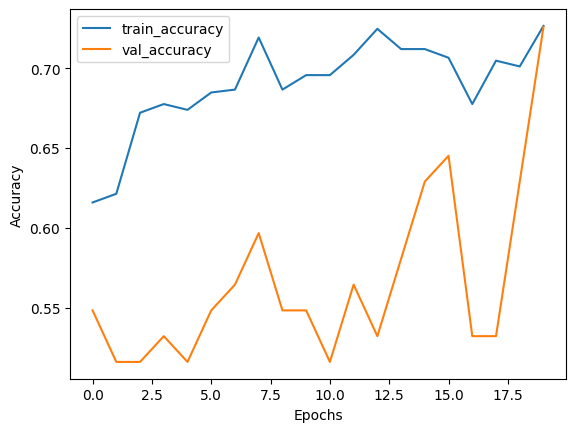

154/154 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.6688
Test Loss, Test Accuracy: [0.6134415864944458, 0.6688311696052551]


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Set learning rates and epoch values
learning_rates = [0.001, 0.01, 0.1]
epochs_values = [10, 20, 30]

# Create an empty dictionary
results_dict = {}

# Iterate over each learning rate and epoch combination
for learning_rate in learning_rates:
    for epochs_value in epochs_values:
        # Create the model
        model = tf.keras.models.Sequential([
            tf.keras.layers.Normalization(input_shape=[number_of_inputs,], axis=None),
            tf.keras.layers.Dense(units=number_of_inputs, input_shape=(number_of_inputs,), activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model.compile(loss=my_loss_function, metrics=[my_metrics], optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

        # Train the model
        history = model.fit(x=x_train, y=d_train, batch_size=batch_size, epochs=epochs_value, validation_split=0.1, verbose=0)

        # Save the results
        results_dict[(learning_rate, epochs_value)] = history.history['val_accuracy'][-1]

# Find the best learning rate and epoch values
best_params = max(results_dict, key=results_dict.get)
best_learning_rate, best_epochs = best_params

print(f"Best learning rate: {best_learning_rate}, Best epochs: {best_epochs}")

# Create the model with the best learning rate and epoch values
best_model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=[number_of_inputs,], axis=None),
    tf.keras.layers.Dense(units=number_of_inputs, input_shape=(number_of_inputs,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
best_model.compile(loss=my_loss_function, metrics=[my_metrics], optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate))

# Train the best model
best_history = best_model.fit(x=x_train, y=d_train, batch_size=batch_size, epochs=best_epochs, validation_split=0.1)

# Visualize training results
plt.plot(best_history.history['loss'], label='train_loss')
plt.plot(best_history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(best_history.history['accuracy'], label='train_accuracy')
plt.plot(best_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_results = best_model.evaluate(x_test, d_test, batch_size=1)
print("Test Loss, Test Accuracy:", test_results)
